In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

## Clone density distribution

In [2]:
dl_type1 = pd.read_csv('clone_data/dl_type1.csv')
dl_type2 = pd.read_csv('clone_data/dl_type2.csv')
dl_type3 = pd.read_csv('clone_data/dl_type3.csv')

In [3]:
dl_type1['clone_type']='Type 1'
dl_type2['clone_type']='Type 2'
dl_type3['clone_type']='Type 3'

In [4]:
dl_all_clones = pd.concat([dl_type1,dl_type2])
dl_all_clones = pd.concat([dl_all_clones,dl_type3])

In [5]:
trad_type1 = pd.read_csv('clone_data/trad_type1.csv')
trad_type2 = pd.read_csv('clone_data/trad_type2.csv')
trad_type3 = pd.read_csv('clone_data/trad_type3.csv')

In [6]:
trad_type1['clone_type']='Type 1'
trad_type2['clone_type']='Type 2'
trad_type3['clone_type']='Type 3'

In [7]:
trad_all_clones = pd.concat([trad_type1,trad_type2])
trad_all_clones = pd.concat([trad_all_clones,trad_type3])

In [8]:
dl_all_clones['project_type']='Deep Learning'
trad_all_clones['project_type']='Traditional'

In [9]:
repos_size = pd.read_csv("data/slocs_data.csv")

In [10]:
all_clones = pd.concat([dl_all_clones,trad_all_clones])

In [11]:
def get_locc(row):
    startline=row['startline']
    endline = row['endline']
    return endline - startline

In [12]:
all_clones['locc']=all_clones.apply(get_locc, axis=1)

In [13]:
clones_by_type = all_clones.groupby(['repoName','granularity','clone_type','project_type']).agg({'locc':'sum'}).reset_index()

In [14]:
repos_clones_size = pd.merge(clones_by_type,repos_size,how='left', on=['repoName'])

In [15]:
repos_clones_size = repos_clones_size[repos_clones_size['total_sloc'] !=0]

In [16]:
repos_clones_size['LOCC / total SLOC'] = repos_clones_size['locc']/repos_clones_size['total_sloc']

In [17]:
repos_clones_size['LOCC_total_SLOC'] = repos_clones_size['locc']/repos_clones_size['total_sloc']

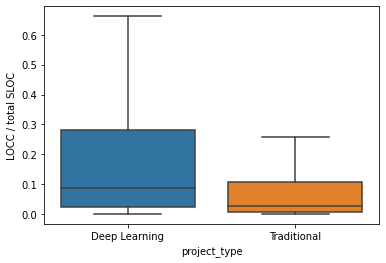

In [18]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size, showfliers=False)
#ml_trad_boxplot.set_yscale("log")

In [19]:
traditional = repos_clones_size[repos_clones_size['project_type']=='Traditional']
dl = repos_clones_size[repos_clones_size['project_type']=='Deep Learning']

In [20]:
stats.mannwhitneyu(traditional.LOCC_total_SLOC,dl.LOCC_total_SLOC)

MannwhitneyuResult(statistic=25987.0, pvalue=5.146640278957621e-16)

In [22]:
stats.mannwhitneyu(traditional.LOCC_total_SLOC,dl.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=25987.0, pvalue=1.0293280557915242e-15)

In [23]:
stats.mannwhitneyu(dl.LOCC_total_SLOC,traditional.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=58498.0, pvalue=1.0293280557915242e-15)

In [32]:
def runs(lst):
    "Iterator, chunks repeated values"
    for j,two in enumerate(lst):
        if j == 0:
            one,i = two,0
        if one!=two:
            yield j - i,one
            i = j
        one=two
    yield j - i + 1,two
def cliffsDelta(lst1,lst2): 
    "Returns true if there are more than 'dull' differences"
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats,x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] <  x: 
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x: 
            j += 1
        less += (n - j)*repeats
    d= (more - less) / (m*n) 
    return abs(d)

In [33]:
cliffsDelta(traditional.LOCC_total_SLOC,dl.LOCC_total_SLOC)

0.7479079126472155

## By clone type

Text(0.5, 1.0, 'Clone occurrences by project type and by clone type')

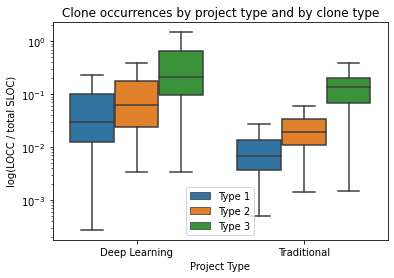

In [36]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size, showfliers=False, hue='clone_type')
ml_trad_boxplot.set_yscale("log")
ml_trad_boxplot.set(xlabel='Project Type', ylabel='log(LOCC / total SLOC)')
plt.legend(loc='best')
plt.title('Clone occurrences by project type and by clone type')

In [37]:
trad_type1 = traditional[traditional['clone_type']=='Type 1']
trad_type2 = traditional[traditional['clone_type']=='Type 2']
trad_type3 = traditional[traditional['clone_type']=='Type 3']

dl_type1 = dl[dl['clone_type']=='Type 1']
dl_type2 = dl[dl['clone_type']=='Type 2']
dl_type3 = dl[dl['clone_type']=='Type 3']

In [38]:
stats.mannwhitneyu(trad_type1.LOCC_total_SLOC,dl_type1.LOCC_total_SLOC)

MannwhitneyuResult(statistic=1627.0, pvalue=3.2953094551306856e-12)

In [39]:
stats.mannwhitneyu(trad_type2.LOCC_total_SLOC,dl_type2.LOCC_total_SLOC)

MannwhitneyuResult(statistic=1812.0, pvalue=9.38365512744147e-10)

In [40]:
stats.mannwhitneyu(trad_type3.LOCC_total_SLOC,dl_type3.LOCC_total_SLOC)

MannwhitneyuResult(statistic=4186.0, pvalue=2.7205326923789545e-06)

In [41]:
cliffsDelta(trad_type1.LOCC_total_SLOC,dl_type1.LOCC_total_SLOC)

0.7832254853160776

In [42]:
cliffsDelta(trad_type2.LOCC_total_SLOC,dl_type2.LOCC_total_SLOC)

0.5262745098039215

In [43]:
cliffsDelta(trad_type3.LOCC_total_SLOC,dl_type3.LOCC_total_SLOC)

0.6464646464646465

In [62]:
def update_granularity(row):
    granularity=row['granularity']
    if 'block' in granularity:
        return 'Block'
    elif 'function' in granularity:
        return 'Function'

In [63]:
repos_clones_size['granularity']=repos_clones_size.apply(update_granularity, axis=1)

In [65]:
repos_clones_size_block = repos_clones_size[repos_clones_size['granularity']=='Block']
repos_clones_size_fct = repos_clones_size[repos_clones_size['granularity']=='Function']

In [66]:
traditional_block = repos_clones_size_block[repos_clones_size_block['project_type']=='Traditional']
dl_block = repos_clones_size_block[repos_clones_size_block['project_type']=='Deep Learning']
traditional_fct = repos_clones_size_fct[repos_clones_size_fct['project_type']=='Traditional']
dl_fct = repos_clones_size_fct[repos_clones_size_fct['project_type']=='Deep Learning']

In [67]:
trad_type1_fct = traditional_fct[traditional_fct['clone_type']=='Type 1']
trad_type2_fct = traditional_fct[traditional_fct['clone_type']=='Type 2']
trad_type3_fct = traditional_fct[traditional_fct['clone_type']=='Type 3']

dl_type1_fct =dl_fct[dl_fct['clone_type']=='Type 1']
dl_type2_fct = dl_fct[dl_fct['clone_type']=='Type 2']
dl_type3_fct = dl_fct[dl_fct['clone_type']=='Type 3']

In [68]:
trad_type1_block = traditional_block[traditional_block['clone_type']=='Type 1']
trad_type2_block = traditional_block[traditional_block['clone_type']=='Type 2']
trad_type3_block = traditional_block[traditional_block['clone_type']=='Type 3']

dl_type1_block = dl_block[dl_block['clone_type']=='Type 1']
dl_type2_block = dl_block[dl_block['clone_type']=='Type 2']
dl_type3_block = dl_block[dl_block['clone_type']=='Type 3']

### function

In [69]:
stats.mannwhitneyu(trad_type1_fct.LOCC_total_SLOC,dl_type1_fct.LOCC_total_SLOC)

MannwhitneyuResult(statistic=344.0, pvalue=3.1256716143260985e-06)

In [73]:
cliffsDelta(trad_type1_fct.LOCC_total_SLOC,dl_type1_fct.LOCC_total_SLOC)

0.5845410628019324

In [71]:
stats.mannwhitneyu(trad_type2_fct.LOCC_total_SLOC,dl_type2_fct.LOCC_total_SLOC)

MannwhitneyuResult(statistic=670.0, pvalue=3.382972751334123e-05)

In [74]:
cliffsDelta(trad_type2_fct.LOCC_total_SLOC,dl_type2_fct.LOCC_total_SLOC)

0.46314102564102566

In [72]:
stats.mannwhitneyu(trad_type3_fct.LOCC_total_SLOC,dl_type3_fct.LOCC_total_SLOC)

MannwhitneyuResult(statistic=1085.0, pvalue=0.001766510851886626)

In [75]:
cliffsDelta(trad_type3_fct.LOCC_total_SLOC,dl_type3_fct.LOCC_total_SLOC)

0.31889516635279347

### blocks

In [76]:
stats.mannwhitneyu(trad_type1_block.LOCC_total_SLOC,dl_type1_block.LOCC_total_SLOC)

MannwhitneyuResult(statistic=458.0, pvalue=7.60737673214229e-08)

In [77]:
cliffsDelta(trad_type1_block.LOCC_total_SLOC,dl_type1_block.LOCC_total_SLOC)

0.617056856187291

In [78]:
stats.mannwhitneyu(trad_type2_block.LOCC_total_SLOC,dl_type2_block.LOCC_total_SLOC)

MannwhitneyuResult(statistic=282.0, pvalue=4.172758725088073e-06)

In [79]:
cliffsDelta(trad_type2_block.LOCC_total_SLOC,dl_type2_block.LOCC_total_SLOC)

0.5988620199146515

In [80]:
stats.mannwhitneyu(trad_type3_block.LOCC_total_SLOC,dl_type3_block.LOCC_total_SLOC)

MannwhitneyuResult(statistic=1016.0, pvalue=0.0002872876666620591)

In [81]:
cliffsDelta(trad_type3_block.LOCC_total_SLOC,dl_type3_block.LOCC_total_SLOC)

0.37438423645320196

Text(0.5, 1.0, '(a) Block Granularity')

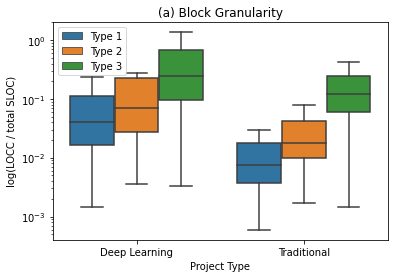

In [86]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size_block, showfliers=False, hue='clone_type')
ml_trad_boxplot.set_yscale("log")
ml_trad_boxplot.set(xlabel='Project Type', ylabel='log(LOCC / total SLOC)')
plt.legend(loc='best')
plt.title('(a) Block Granularity')

Text(0.5, 1.0, '(a) Function Granularity')

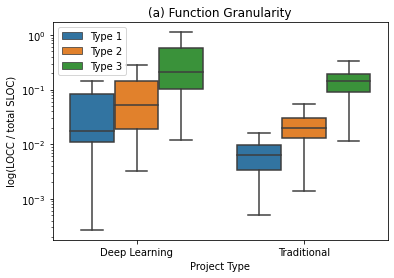

In [87]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size_fct, showfliers=False, hue='clone_type')
ml_trad_boxplot.set_yscale("log")
ml_trad_boxplot.set(xlabel='Project Type', ylabel='log(LOCC / total SLOC)')
plt.legend(loc='best')
plt.title('(a) Function Granularity')

Text(0.5, 1.0, '(a) Function Granularity')

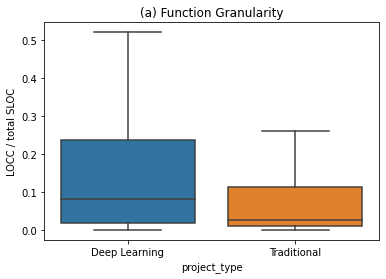

In [94]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size_fct, showfliers=False)
#ml_trad_boxplot.set_yscale("log")
plt.title('(a) Function Granularity')

Text(0.5, 1.0, '(a) Block Granularity')

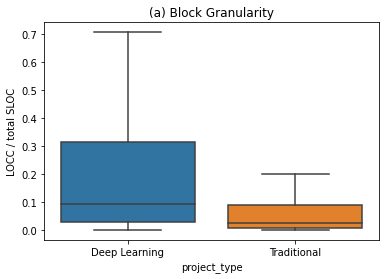

In [95]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size_block, showfliers=False)
#ml_trad_boxplot.set_yscale("log")
plt.title('(a) Block Granularity')

In [90]:
stats.mannwhitneyu(traditional_block.LOCC_total_SLOC,dl_block.LOCC_total_SLOC)

MannwhitneyuResult(statistic=5936.0, pvalue=3.0068434096511597e-10)

In [91]:
cliffsDelta(traditional_block.LOCC_total_SLOC,dl_block.LOCC_total_SLOC)

0.5269298075053471

In [92]:
stats.mannwhitneyu(traditional_fct.LOCC_total_SLOC,dl_fct.LOCC_total_SLOC)

MannwhitneyuResult(statistic=7111.0, pvalue=1.7841482512278643e-07)

In [93]:
cliffsDelta(traditional_fct.LOCC_total_SLOC,dl_fct.LOCC_total_SLOC)

0.80374780762485